# Volúmenes finitos para una ecuación de difusión 1d

Dado el dato $\beta\in\mathbb R$ (se puede generalizar a una función $\beta(x)$), planteamos hallar $q=q(x,t)$ tal que
$$
q_t = \beta q_{xx} 
$$

Lo anterior lo podemos escribir como una ley de conservación
$$
q_t + (f(q))_x = 0
$$
para el flujo $f(q_x)=-\beta q_x$.


### Método de los volúmenes finitos para una ecuación de difusión 1d

Método de los volúmenes finitos para la ecuación de difusión:
$$
Q^{n+1}_i = Q^n_i - \frac{\Delta t}{\Delta x} (F^{n}_{i+1/2} - F^{n}_{i-1/2}),
$$
donde $F^n$ se define de modo que sea proporcional a la diferencia de $Q$ entre dos celdas:
$$
F^n_{i-1/2}={\cal F}(Q^n_{i-1}, Q^n_{i})=-\beta\frac{Q^n_{i}-Q^n_{i-1}}{\Delta x}.
$$
Sustituyendo:
$$
Q^{n+1}_i = Q^n_i + \frac{\Delta t}{(\Delta x)^2} \beta (Q^n_{i-1} - 2 Q^n_{i} + Q^n_{i+1}).
$$

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [10]:
def difusion1D_MVF(a, b, beta, Q_inicial, dx, dt, nt):
    """
    a, b : intervalo en x [a,b]
    beta : parámetro del sistema
    Q_inicial: array [Q^0_1, Q^0_2,..., Q^0_N]
    dx, dt: incrementos en x y en t
    nt: número de pasos en tiempo
    """
    nx = len(Q_inicial) # Q_inicial contiene todos los valores
    N = nx-2 # Valores interiores (quitando los dos extremos)
    Q = np.zeros( (nt+1, nx) )
    Q[0,:] = Q_inicial # Iniciamos Q en el t0 
    r = dt/(dx*dx)*beta
    
    if(r>=1): 
        print(f"Cuidado! no se verifica la condición CFL, pues beta*dt/dx^2 = {r} >=1 ")

    for n in range(nt): # 0, 1, ..., nt-1
        # 1. Introducir condiciones de contorno (Dirichlet)
        Q[n+1, 0], Q[n+1, -1] = Q[n, 0], Q[n, -1]
        
        # 2. Calcular valores internos
        for i in range(1,N+1): # 1,..., N
            Q[n+1, i] = Q[n,i] \
                + r*(Q[n,i-1] - 2*Q[n,i] + Q[n,i+1])
    return(Q)

Fotograma 0


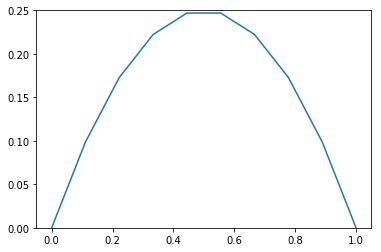

Fotograma 5


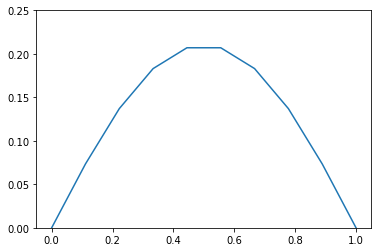

Fotograma 10


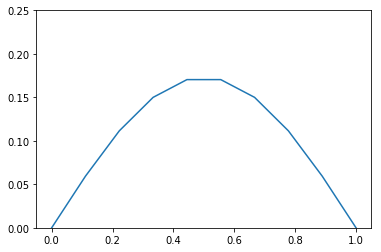

Fotograma 15


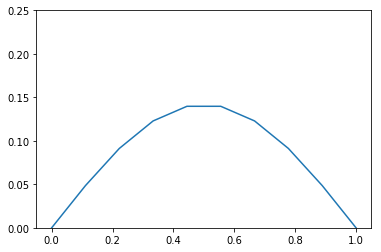

Fotograma 20


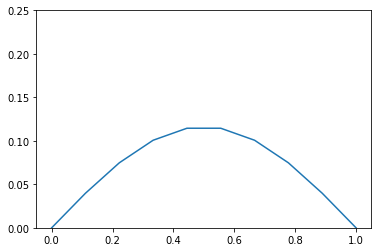

Fotograma 25


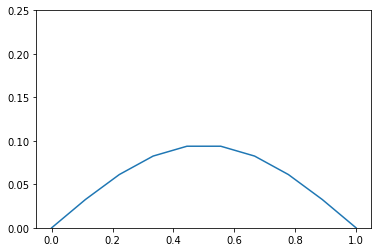

Fotograma 30


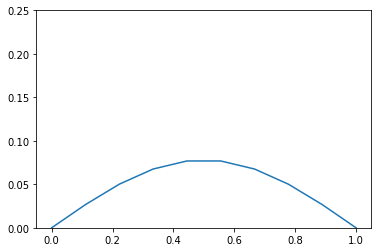

Fotograma 35


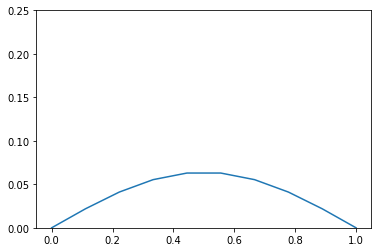

Fotograma 40


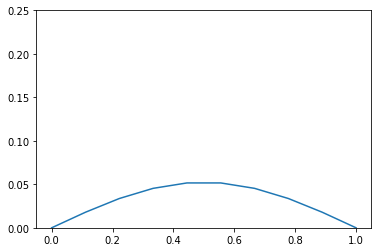

Fotograma 45


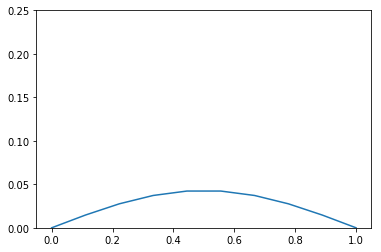

Fotograma 50


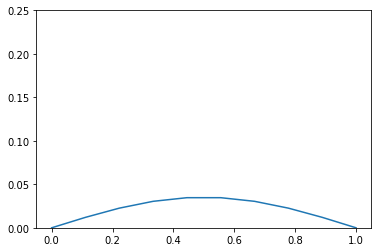

Fotograma 55


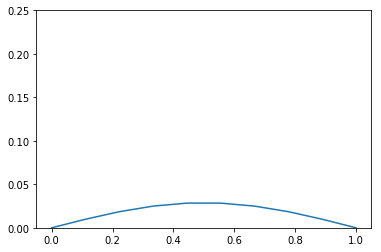

Fotograma 60


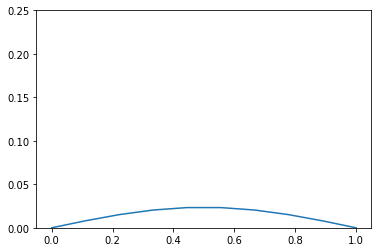

Fotograma 65


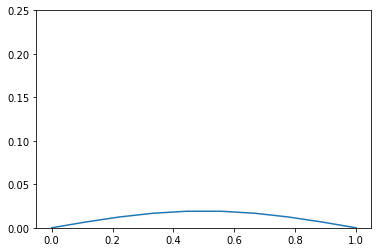

Fotograma 70


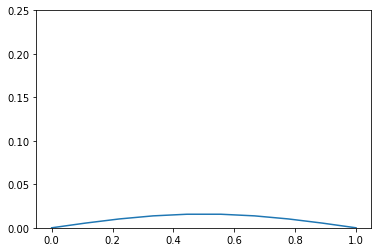

Fotograma 75


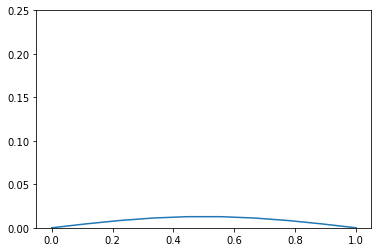

Fotograma 80


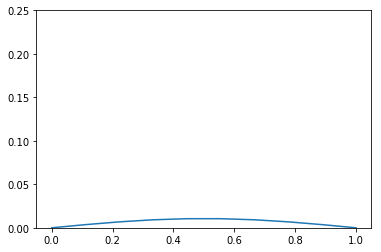

Fotograma 85


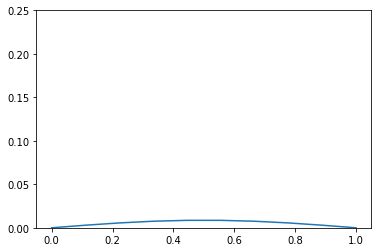

Fotograma 90


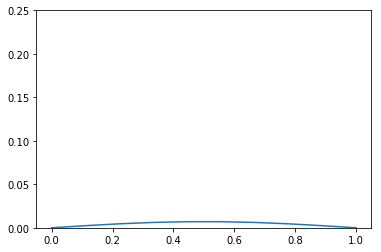

Fotograma 95


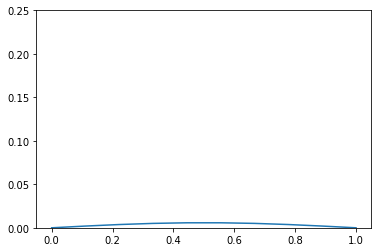

In [27]:
# Datos
a, b = 0, 1
nx=10
x_i = np.linspace(a,b,nx) # Array de nx puntos en [a,b]

def q0(x): 
    return 0 -(x-a)*(x-b) # Parábola cónocava, en a y en b

Q0 = q0(x_i) # Vector de valores iniciales

# Test
nt = 100
Q = difusion1D_MVF(a, b, beta=1, Q_inicial=Q0, 
                   dx=x_i[1]-x_i[0], dt=0.004, nt=nt)

fotogramas_a_mostrar = list(range(0,nt,5))
for n in fotogramas_a_mostrar:
    print(f"Fotograma {n}")
    plt.ylim((0,0.25))
    y_i = Q[n,:]
    plt.plot(x_i, y_i)
    plt.show()

# Animación

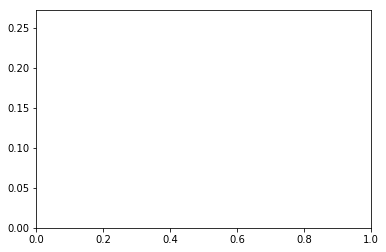

In [24]:
from matplotlib import animation, rc
from IPython.display import HTML

# First set up the figure, the axis, and the plot element we want to animate
fig, ax = plt.subplots()

ax.set_xlim(( a, b))
y_m = min(Q[0,:])
y_M = max(Q[0,:])
ax.set_ylim( (0.9*y_m, 1.1*y_M) )

line, = ax.plot([], [], lw=2, color="orange")
# Pulsar tecla 'o' para suprimir la salida de esta celda

In [25]:
# Initialization function, which plots the background of each frame:
def init():
    line.set_data([], [])
    return (line,)

# Animation function, which is called for each new frame:
def animate(i):
    y_i = Q[i,:]
    line.set_data(x_i, y_i)
    return (line,)

# Compile the animation. Setting blit=True will only re-draw
# the parts that have changed.
anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=nt, interval=20, 
                               blit=True)

In [26]:
HTML(anim.to_jshtml())

In [7]:
v=np.linspace(0,1)
min(v)

0.0

In [ ]:
class MVF(Object):
    ...

metodo = MVF(a,b)
metodo.set_beta(3)
metodo.

solucion_t1 = metodo.step();
solucion_t2 = metodo.step();
solucion=[]
for n in range(nt):
    solucion.append(metodo.step())